In [28]:
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [29]:
conn = sqlite3.connect('crime_census_weather.db')
c = conn.cursor()
#weather_df = pd.read_sql('''select * from weather_data''', conn)
df = pd.read_sql('''select * from crime_census_weather''', conn)

In [31]:
df.head()

,level_0,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,offensegroup,LONGITUDE,END_DATE,offense-text,SHIFT,YBLOCK,DISTRICT,...,MedianAgeMargin,HousingUnits,HousingUnitsMargin,UnweightedSampleHousingUnits,State,County,Tract,BlockGroup,Year_Census,_merge
0,0,cluster 5,5500.0,property,-77.052353,2009-03-30T15:50:00.000,theft/other,evening,137490.0,2.0,...,5.6,1629.0,185.0,100.0,11.0,1.0,005500,2,2009,both
1,1,cluster 4,202.0,property,-77.062857,2009-03-30T16:30:00.000,theft/other,evening,137621.0,2.0,...,14.6,456.0,89.0,34.0,11.0,1.0,000202,3,2009,both
2,2,cluster 17,1804.0,violent,-77.027957,2009-03-30T00:00:00.000,robbery,evening,143785.0,4.0,...,13.7,559.0,111.0,36.0,11.0,1.0,001804,2,2009,both
3,3,cluster 14,1002.0,property,-77.076820,2009-03-30T07:30:00.000,motor vehicle theft,evening,141241.0,2.0,...,3.5,1038.0,146.0,47.0,11.0,1.0,001002,2,2009,both
4,4,cluster 23,8904.0,property,-76.979941,2009-03-30T20:30:00.000,theft/other,evening,137077.0,5.0,...,5.4,476.0,91.0,32.0,11.0,1.0,008904,2,2009,both


In [32]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['START_YEAR'] = df['START_DATE'].dt.year
df['START_MONTH'] = df['START_DATE'].dt.month
df['START_DAY'] = df['START_DATE'].dt.day
df['START_DAY_OF_WEEK'] = df['START_DATE'].dt.weekday_name
df['START_DAY_WEEK_OF_YEAR'] = df['START_DATE'].dt.week
df['START_TIME'] = df['START_DATE'].dt.time
df['START_DAY_HOUR'] = df['START_DATE'].dt.hour
df['START_DAY_MINUTE'] = df['START_DATE'].dt.minute

df['START_TIME_CATEGORY'] = pd.cut(df['START_DATE'].dt.hour,8,labels=['12am-3am','3am-6am','6am-9am','9am-12pm','12pm-3pm','3pm-6pm','6pm-9pm','9pm-12am'],include_lowest=True)


In [33]:
df.head()

,level_0,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,offensegroup,LONGITUDE,END_DATE,offense-text,SHIFT,YBLOCK,DISTRICT,...,_merge,START_YEAR,START_MONTH,START_DAY,START_DAY_OF_WEEK,START_DAY_WEEK_OF_YEAR,START_TIME,START_DAY_HOUR,START_DAY_MINUTE,START_TIME_CATEGORY
0,0,cluster 5,5500.0,property,-77.052353,2009-03-30T15:50:00.000,theft/other,evening,137490.0,2.0,...,both,2009.0,3.0,30.0,Monday,14.0,05:30:00,5.0,30.0,3am-6am
1,1,cluster 4,202.0,property,-77.062857,2009-03-30T16:30:00.000,theft/other,evening,137621.0,2.0,...,both,2009.0,3.0,30.0,Monday,14.0,16:20:00,16.0,20.0,3pm-6pm
2,2,cluster 17,1804.0,violent,-77.027957,2009-03-30T00:00:00.000,robbery,evening,143785.0,4.0,...,both,2009.0,3.0,30.0,Monday,14.0,17:00:00,17.0,0.0,3pm-6pm
3,3,cluster 14,1002.0,property,-77.076820,2009-03-30T07:30:00.000,motor vehicle theft,evening,141241.0,2.0,...,both,2009.0,3.0,29.0,Sunday,13.0,07:00:00,7.0,0.0,6am-9am
4,4,cluster 23,8904.0,property,-76.979941,2009-03-30T20:30:00.000,theft/other,evening,137077.0,5.0,...,both,2009.0,3.0,30.0,Monday,14.0,18:40:00,18.0,40.0,6pm-9pm


In [34]:
df['START_TIME_CATEGORY'].value_counts()

6pm-9pm     67263
3pm-6pm     63856
12pm-3pm    59646
9pm-12am    58214
9am-12pm    48898
12am-3am    35679
6am-9am     30830
3am-6am     16668
Name: START_TIME_CATEGORY, dtype: int64

In [35]:
df[['START_DAY_OF_WEEK','START_TIME_CATEGORY']].describe()

,START_DAY_OF_WEEK,START_TIME_CATEGORY
count,381054,381054
unique,7,8
top,Friday,6pm-9pm
freq,59702,67263


In [36]:
df['START_MONTH'].value_counts()

10.0    35666
7.0     35665
8.0     35201
9.0     34053
6.0     33870
5.0     33623
11.0    31785
12.0    31469
4.0     29249
1.0     29073
3.0     27374
2.0     24026
Name: START_MONTH, dtype: int64

In [37]:
df['START_YEAR'].value_counts()

2014.0    38337
2015.0    37325
2016.0    37141
2013.0    35863
2012.0    35194
2008.0    34172
2018.0    33355
2011.0    33319
2017.0    32995
2010.0    31673
2009.0    31236
2007.0      305
2000.0       39
2006.0       27
2005.0       15
2004.0       12
2001.0        9
1915.0        6
1916.0        6
2002.0        5
2003.0        5
1999.0        3
1985.0        2
1912.0        2
1997.0        1
1993.0        1
1991.0        1
1981.0        1
1980.0        1
1974.0        1
1914.0        1
1800.0        1
Name: START_YEAR, dtype: int64

In [38]:
df = df.drop(df[(df.START_YEAR < 2013.0) | (df.START_YEAR > 2017.0)].index)

In [39]:
df['START_YEAR'].value_counts()

2014.0    38337
2015.0    37325
2016.0    37141
2013.0    35863
2017.0    32995
Name: START_YEAR, dtype: int64

In [40]:
pivot_df_year = df[df['offensegroup']=='violent'].pivot_table(index = 'START_YEAR',
                          columns='OFFENSE'
                          ,values='OCTO_RECORD_ID'
                          , aggfunc='count')

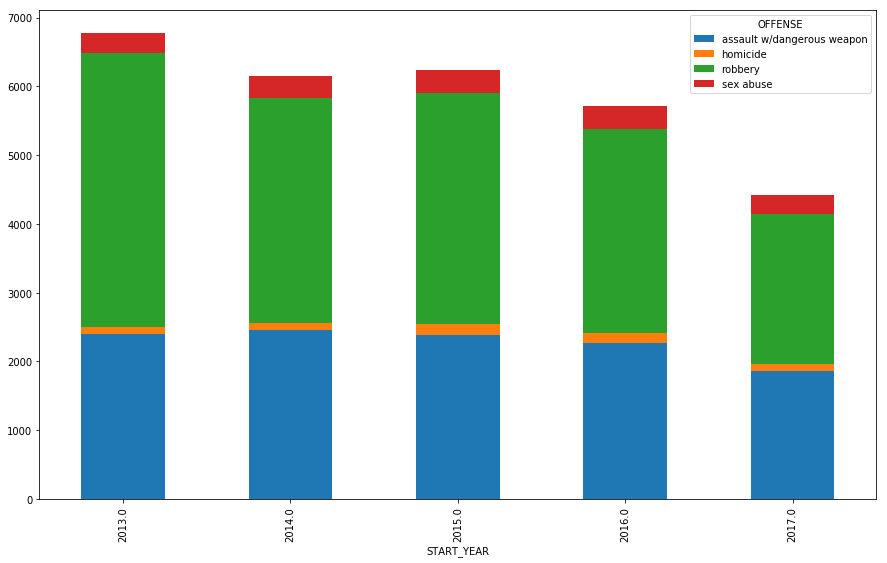

In [41]:
pivot_df_year.plot.bar(stacked=True, figsize=(15,9))

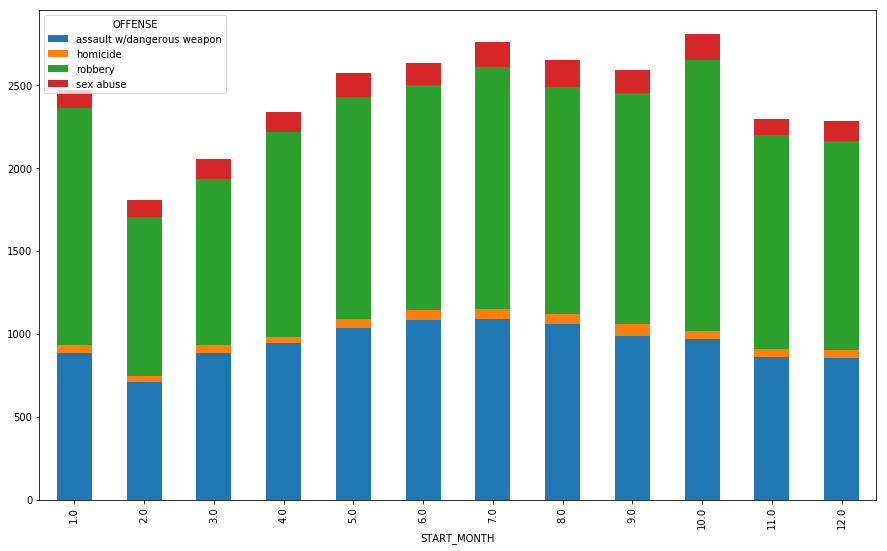

In [14]:
pivot_df_month = df[df['offensegroup']=='violent'].pivot_table(index = 'START_MONTH',
                          columns='OFFENSE'
                          ,values='OCTO_RECORD_ID'
                          , aggfunc='count')
pivot_df_month.plot.bar(stacked=True, figsize=(15,9))

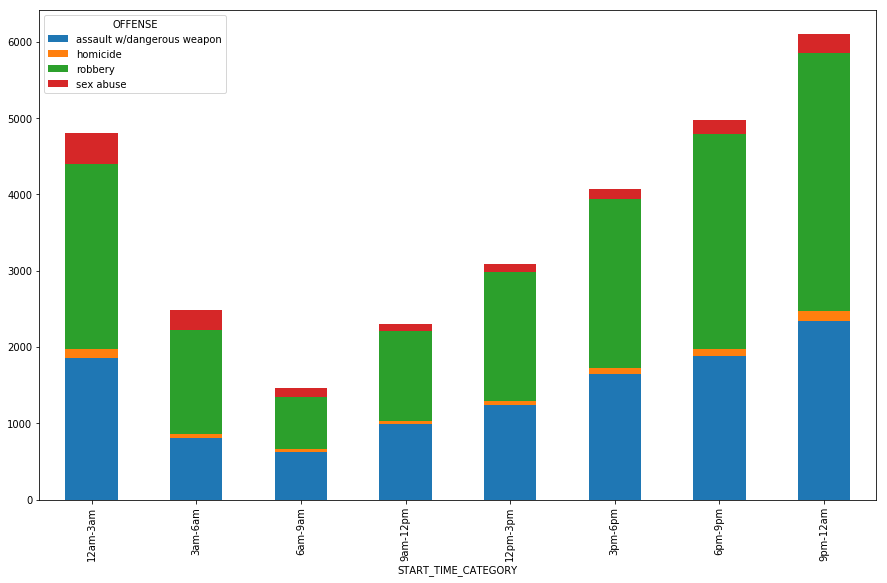

In [15]:
pivot_df_time = df[df['offensegroup']=='violent'].pivot_table(index = 'START_TIME_CATEGORY',
                          columns='OFFENSE'
                          ,values='OCTO_RECORD_ID'
                          , aggfunc='count')
pivot_df_time.plot.bar(stacked=True, figsize=(15,9))

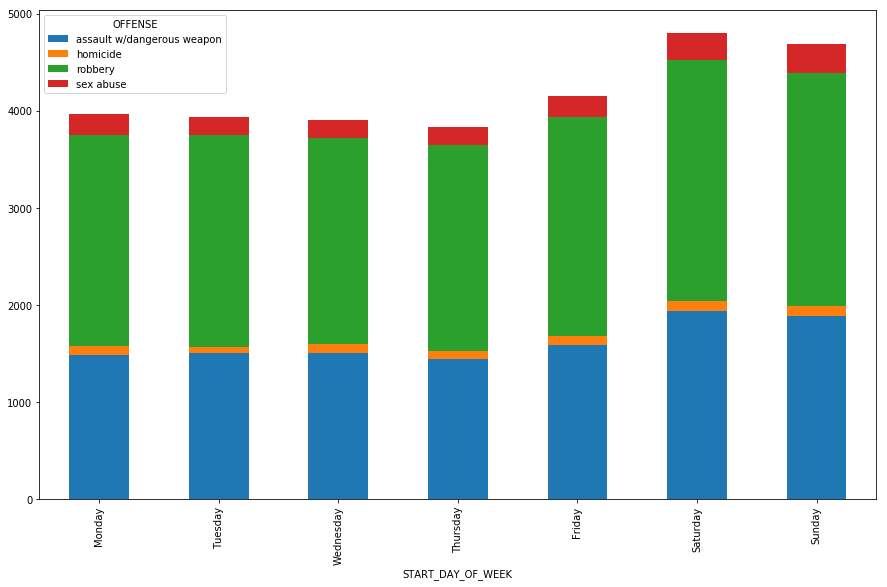

In [16]:
order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']

pivot_df_day = df[df['offensegroup']=='violent'].pivot_table(index = 'START_DAY_OF_WEEK',
                          columns='OFFENSE'
                          ,values='OCTO_RECORD_ID'
                          , aggfunc='count').loc[order]
pivot_df_day.plot.bar(stacked=True, figsize=(15,9))

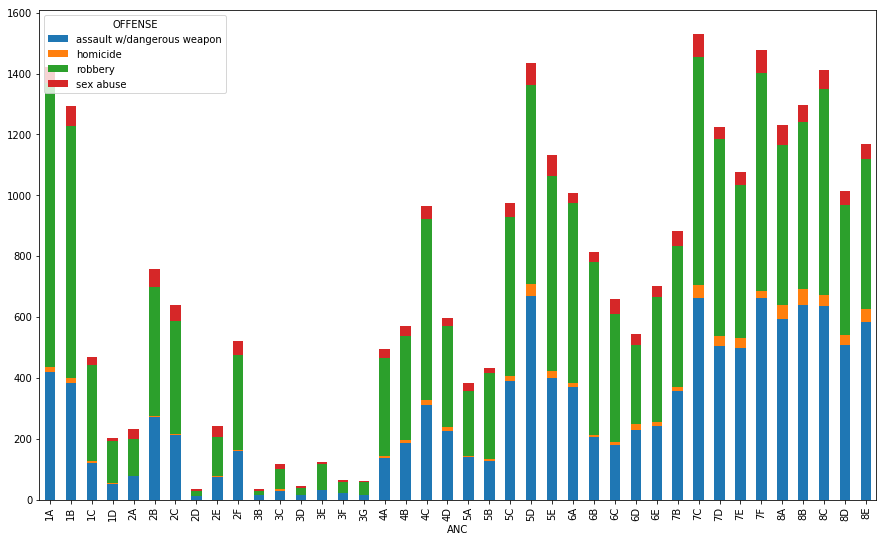

In [17]:
pivot_df_time = df[df['offensegroup']=='violent'].pivot_table(index = 'ANC',
                          columns='OFFENSE'
                          ,values='OCTO_RECORD_ID'
                          , aggfunc='count')
pivot_df_time.plot.bar(stacked=True, figsize=(15,9))

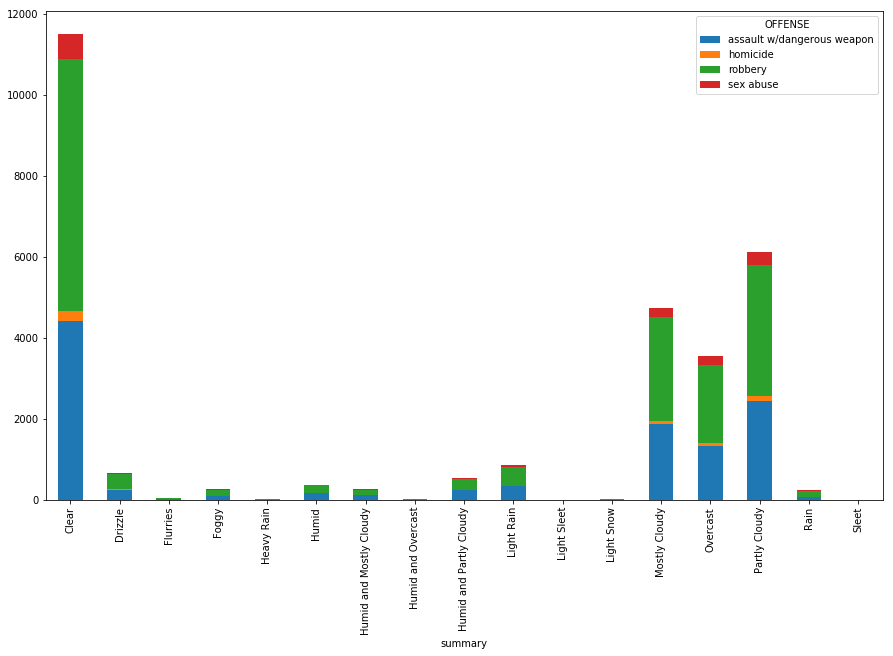

In [59]:
pivot_df_weathersummary = df[df['offensegroup']=='violent'].pivot_table(index = 'summary',
                          columns='OFFENSE'
                          ,values='OCTO_RECORD_ID'
                          , aggfunc='count')
pivot_df_weathersummary.plot.bar(stacked=True, figsize=(15,9))

In [55]:
df_grouped = df_2013.groupby(
        by=['BLOCK_GROUP']
    )['OCTO_RECORD_ID'].count().reset_index(name='count_by_blockgroup')

In [56]:
df_grouped.head()

,BLOCK_GROUP,count_by_blockgroup
0,000100 1,3
1,000100 2,2
2,000100 3,2
3,000100 4,15
4,000201 1,1


In [58]:
df_2013[['BLOCK_GROUP','TotalPop']]

,BLOCK_GROUP,TotalPop
16794,010700 2,999.0
17430,004801 1,2148.0
17431,007502 2,2108.0
17434,007806 1,1147.0
17435,007803 1,618.0
17440,004400 2,2258.0
17452,005800 2,1834.0
17453,nan,NaN
17462,008702 1,1552.0
17463,004901 1,1227.0
